In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style('ticks')

%matplotlib inline
import warnings, glob, os
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)

### Read cell info and expression

In [2]:
norm_type = 'tpm' # tmm | tpm

In [3]:
# for cluster info, we only used cluster results based on tpm

cell_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_{}_cluster.csv'.format(norm_type), index_col=0)
print (cell_df.shape)
cell_df.head()

(1116, 14)


,sample_id,batch,cell_number,n_genes,percent_mito,n_counts,louvain,louvain2,cluster,UMAP1,UMAP2,PC1,PC2,patient_id
RHH2176,HN120P,RHH,2176,3602,0.080225,998435.90,11,NaN,L,3.201271,-2.425818,-4.143686,-2.367795,HN120
RHH2177,HN120P,RHH,2177,5748,0.089887,997598.06,3,0.0,D1,-1.227317,-4.840552,-7.919834,-5.335183,HN120
RHH2178,HN120P,RHH,2178,6648,0.117123,995340.75,3,0.0,D1,-1.451122,-4.950207,-8.271693,-7.211134,HN120
RHH2179,HN120P,RHH,2179,7076,0.104144,995187.60,3,0.0,D1,-2.037618,-5.146482,-12.387367,-6.740571,HN120
RHH2180,HN120P,RHH,2180,7261,0.111637,993863.56,3,0.0,D1,-2.668286,-4.637366,-13.875086,-8.836975,HN120


In [4]:
cell_exp_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_{}.csv'.format(norm_type), index_col=0)
cell_exp_df = cell_exp_df[cell_df.index]

In [5]:
cell_exp_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,7.01,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
AAAS,0.0,93.09,111.26,0.0,32.37,0.00,0.0,97.36,15.79,116.97,...,0.0,0.00,13.60,19.91,3.10,1.6,8.98,5.48,0.0,0.0
AACS,0.0,0.00,0.00,0.0,0.00,1.30,0.0,0.00,0.00,0.00,...,0.0,0.42,7.12,27.36,1.39,0.0,4.92,9.56,0.0,2.5
AADAC,0.0,0.00,86.89,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,43.00,0.00,0.00,0.0,0.00,26.14,0.0,0.0
AADAT,0.0,0.00,0.00,0.0,0.00,107.07,0.0,0.00,0.00,123.51,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0


### Bulk expression

In [6]:
# ../data/HN_patient_specific/HN_bulk_RNASeq/HN159PRI_1_2D/HN159PRI_1_2D.expression.genes.xls
bulk_fpkm_df_list = []

for dir_name in glob.glob('../data/HN_patient_specific/HN_bulk_RNASeq/*'):
    sample_id = dir_name.split('/')[-1]
    file_name = os.path.join(dir_name, '{}.expression.genes.xls'.format(sample_id))
    df = pd.read_csv(file_name, sep='\t', index_col='gene_short_name')[['{} [EXP:FPKM:CUFFNORM]'.format(sample_id)]]
    df.columns = [sample_id.split('_')[0][0:-2]]
    bulk_fpkm_df_list += [df]

In [7]:
bulk_fpkm_df = pd.concat(bulk_fpkm_df_list, axis=1)

In [8]:
bulk_fpkm_df.head()

,HN159M,HN159P,HN120P,HN137M,HN182R,HN120M,HN148P,HN160M,HN148M,HN137P,HN160P
gene_short_name,,,,,,,,,,,
TSPAN6,97.30130,68.73960,54.51890,38.91600,31.32050,73.08180,79.96030,60.54830,70.65150,50.70340,48.17900
TNMD,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
DPM1,73.32150,84.49620,168.53300,50.34160,92.11330,209.93500,59.34080,81.70450,86.10260,95.23210,56.88760
SCYL3,3.85641,2.21767,7.25213,3.11863,2.78461,5.20462,3.11625,4.56043,2.48407,4.80125,3.25081
C1orf112,19.64780,9.72258,43.88870,7.63568,16.45050,31.11580,9.27749,13.33260,16.57150,14.84120,12.62210


In [9]:
bulk_tpm_df = (bulk_fpkm_df / bulk_fpkm_df.sum()) * 1000000
bulk_tpm_df.head()

,HN159M,HN159P,HN120P,HN137M,HN182R,HN120M,HN148P,HN160M,HN148M,HN137P,HN160P
gene_short_name,,,,,,,,,,,
TSPAN6,160.043325,119.185759,100.205497,60.409263,52.157598,132.791849,138.552715,98.083870,120.546073,85.553060,82.670678
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,120.600821,146.505708,309.762907,78.145210,153.395010,381.458268,102.823888,132.355385,146.908845,160.687400,97.613824
SCYL3,6.343108,3.845159,13.329383,4.841046,4.637173,9.456953,5.399741,7.387567,4.238337,8.101264,5.578087
C1orf112,32.317135,16.857722,80.667236,11.852858,27.394791,56.538353,16.075745,21.597848,28.274407,25.041912,21.658348


In [10]:
bulk_tpm_df = bulk_tpm_df.reset_index().groupby('gene_short_name').mean()
bulk_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/bulk_tpm.csv')

##### Cell line average single cell TPM

In [11]:
tpm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_tpm.csv', index_col=0)
tpm_df = tpm_df[cell_df.index].T

In [12]:
tpm_df = pd.merge(tpm_df, cell_df[['sample_id']], left_index=True, right_index=True)

In [13]:
mean_tpm_df = tpm_df.groupby('sample_id').mean()
mean_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/mean_tpm.csv')

In [14]:
max_tpm_df = tpm_df.groupby('sample_id').max()
max_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/max_tpm.csv')

In [15]:
q95_tpm_df = tpm_df.groupby('sample_id').quantile(q=0.95)
q95_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/q95_tpm.csv')

q75_tpm_df = tpm_df.groupby('sample_id').quantile(q=0.75)
q75_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/q75_tpm.csv')

##### compare aggregated single-cell and bulk

Previously we observed Q95 show the bested correlation. However, based on the current analysis on RNAseq TPM, we observed that average works the best

In [16]:
common_gene_list = sorted(list(set(bulk_tpm_df.index).intersection(q95_tpm_df.columns)))
len(common_gene_list)

12238

In [17]:
common_cl_list = sorted(list(set(bulk_tpm_df.columns).intersection(q95_tpm_df.index)))
len(common_cl_list)

10

In [55]:
x = bulk_tpm_df.loc[common_gene_list, common_cl_list].T.values.flatten()

y_mean = mean_tpm_df.loc[common_cl_list, common_gene_list].values.flatten()
y_max = max_tpm_df.loc[common_cl_list, common_gene_list].values.flatten()
y_q95 = q95_tpm_df.loc[common_cl_list, common_gene_list].values.flatten()

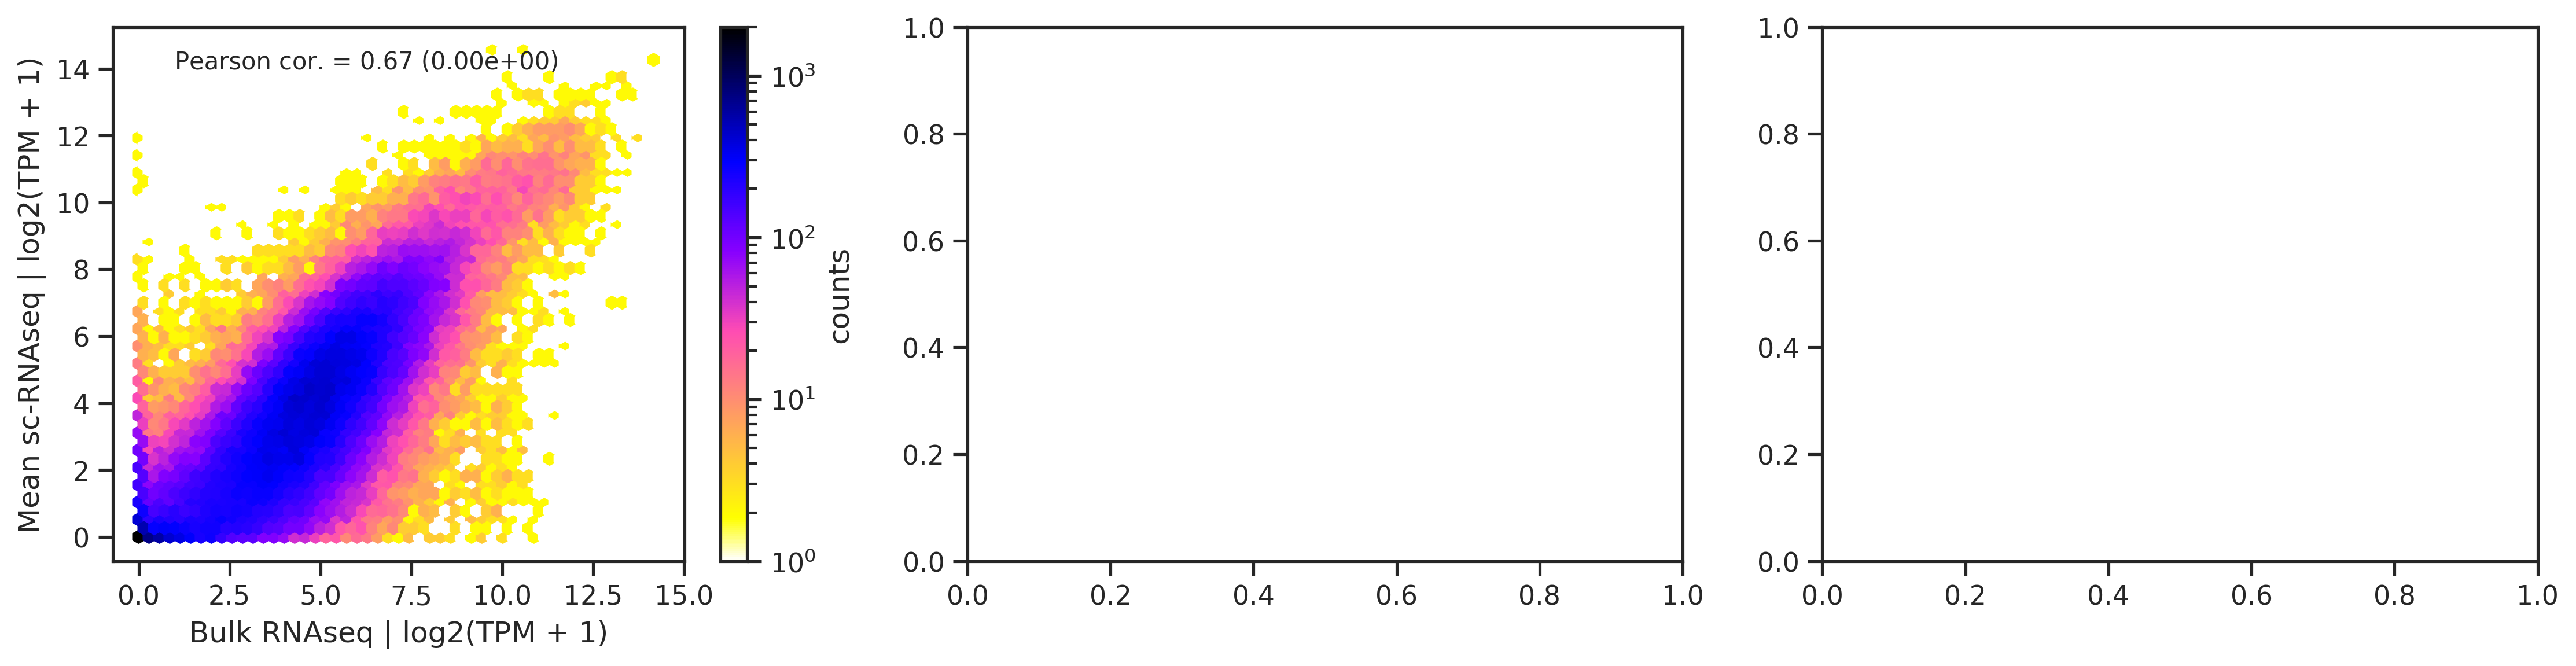

In [56]:
sns.set(font_scale=1, style='ticks')
fig, axes = plt.subplots(figsize=(15,4), ncols=3)

for y_name, y_val, ax in zip(['Mean', 'Max', 'Q95'], [y_mean, y_max, y_q95], axes.flatten()):
    
    im = ax.hexbin(np.log2(x+1), np.log2(y_val+1), gridsize=50, bins='log', cmap='gnuplot2_r', vmin=1, vmax=2000)
    ax.set_xlabel('Bulk RNAseq | log2(TPM + 1)')
    ax.set_ylabel('{} sc-RNAseq | log2(TPM + 1)'.format(y_name))
#     fig.colorbar(im, label='Log10(count + 1)')
    pcor, pval = stats.pearsonr(x, y_val)
    ax.text(x=1, y=14, s='Pearson cor. = {:.2f} ({:.2e})'.format(pcor, pval), fontsize=10)
    
    break

cb = fig.colorbar(im, ax=ax)
cb.set_label('counts')
plt.tight_layout()

In [37]:
x_mat = bulk_tpm_df.loc[common_gene_list, common_cl_list].T.values
y_mean_mat = mean_tpm_df.loc[common_cl_list, common_gene_list].values

In [38]:
x_mat.shape, y_mean_mat.shape

((10, 12238), (10, 12238))

(0.0, 1.0, 0.0, 1.0)

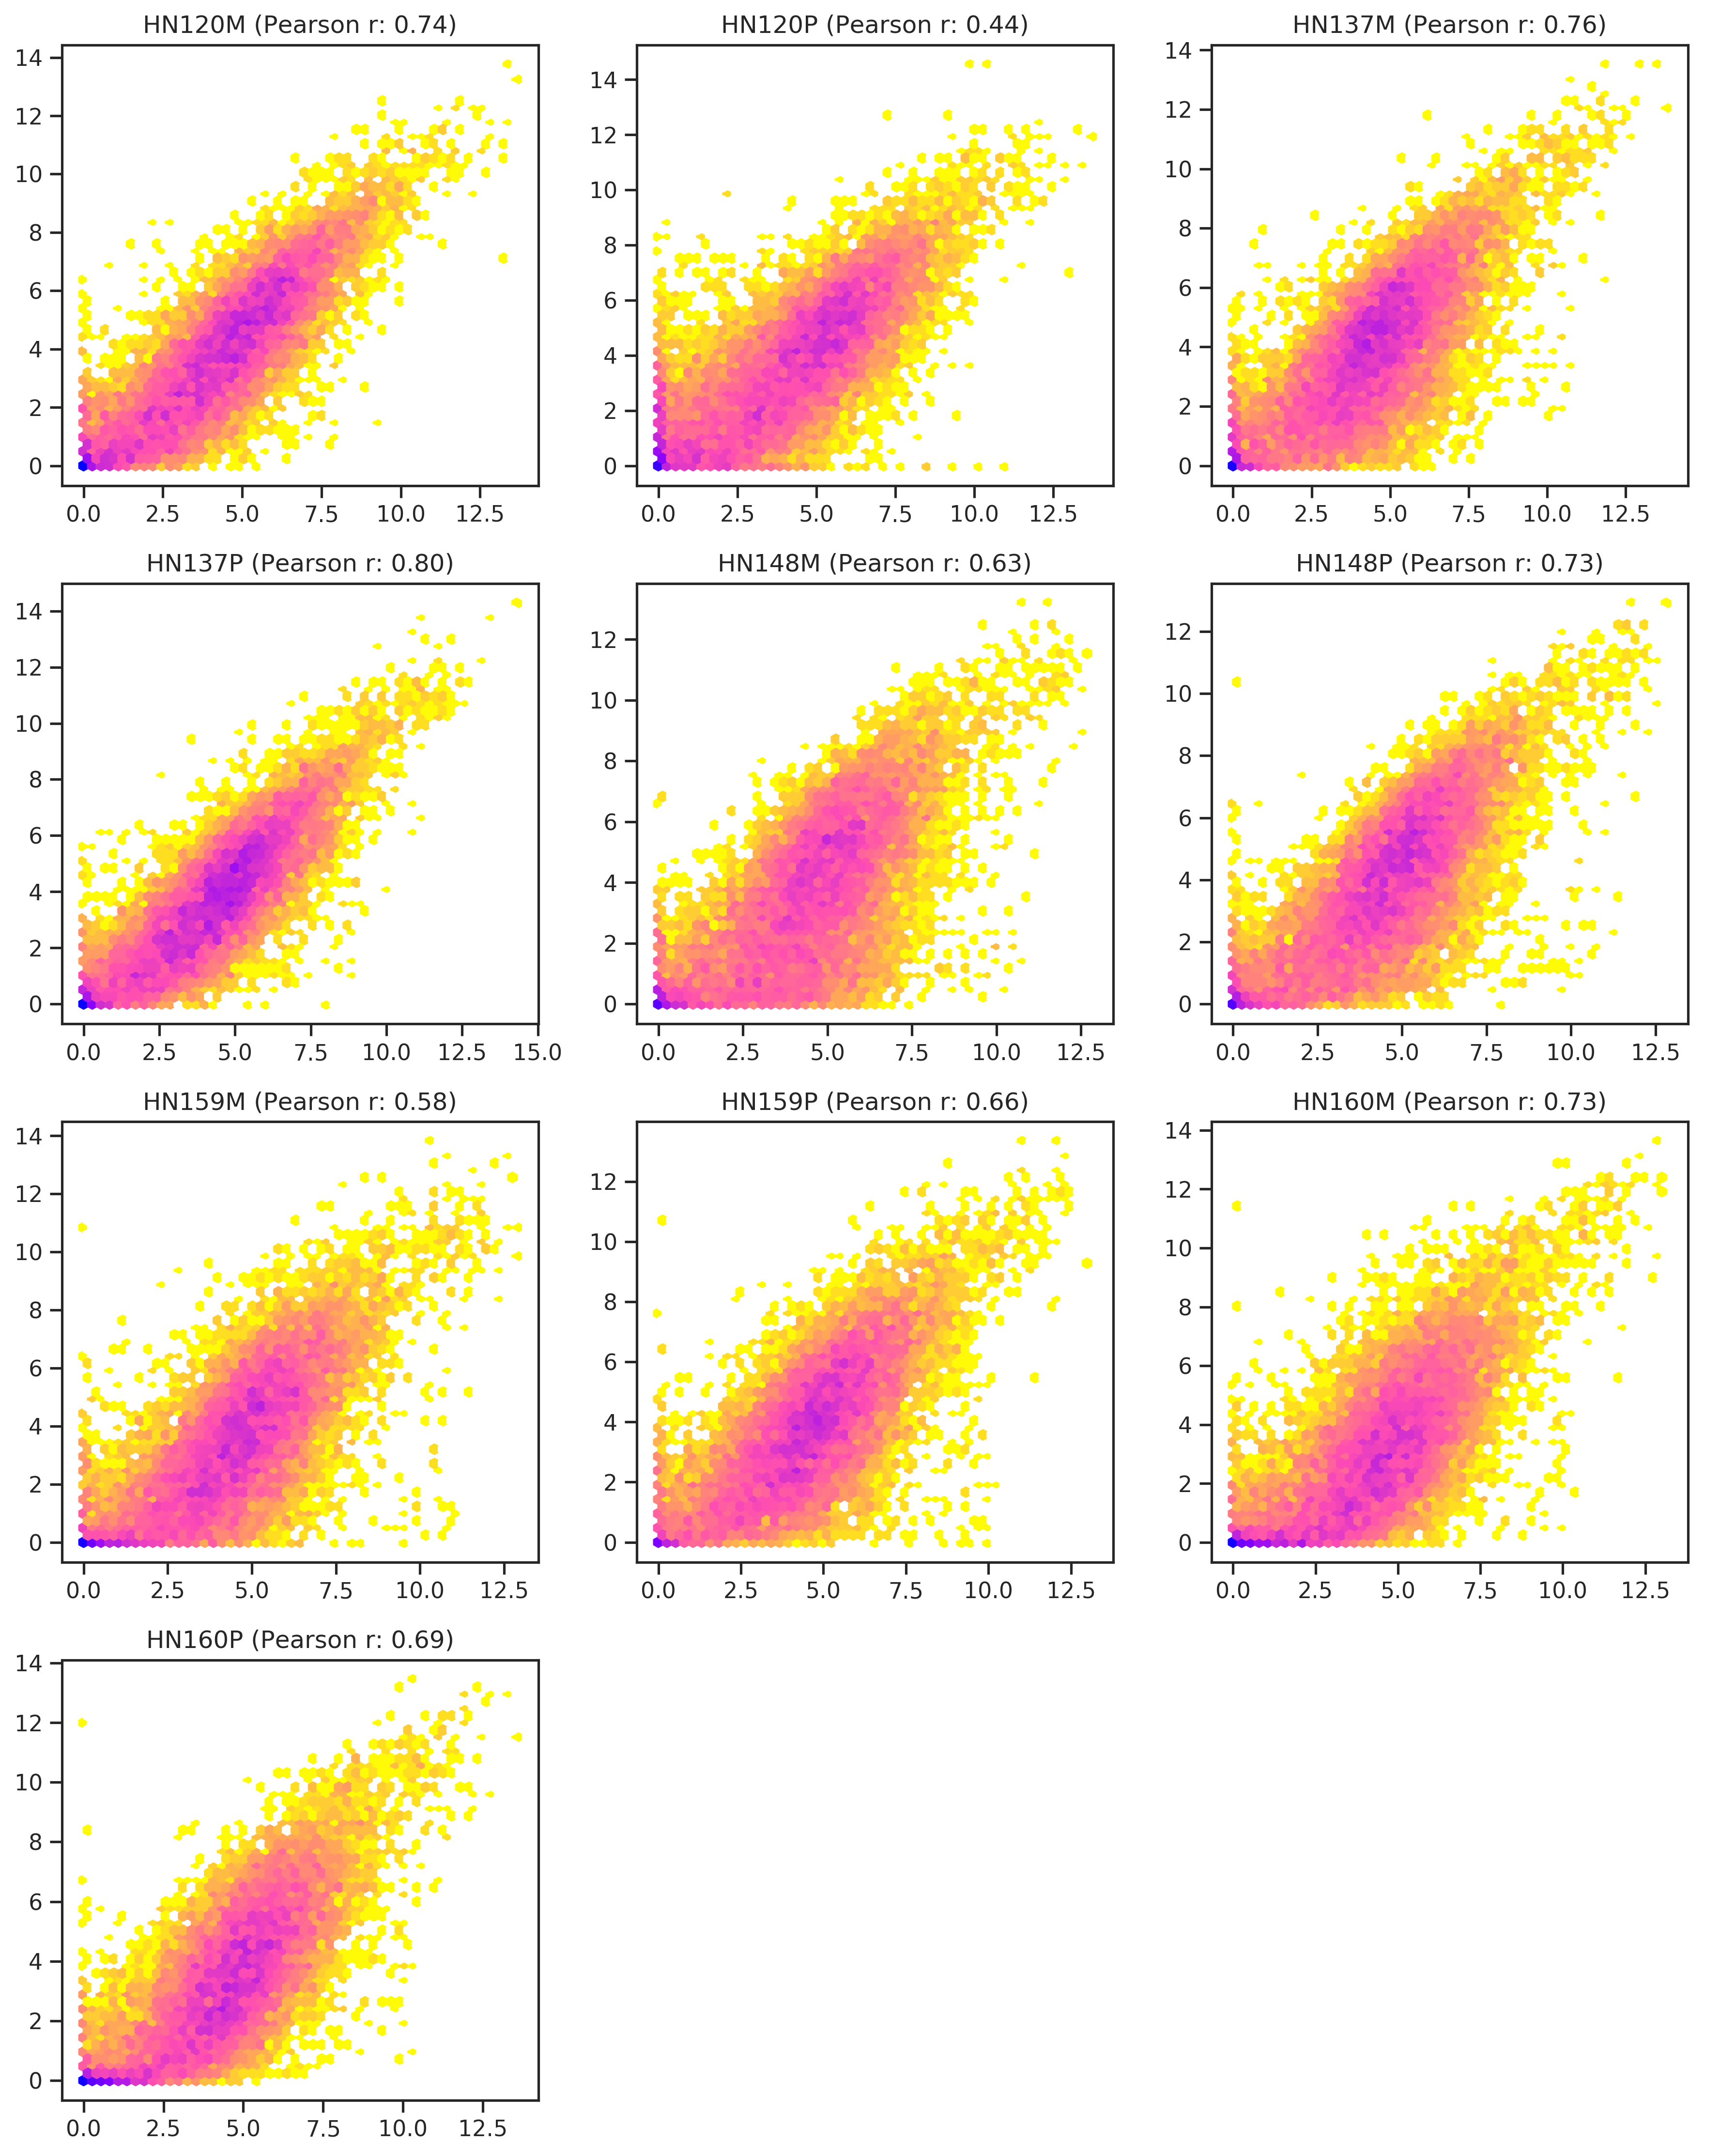

In [58]:
fig, axes = plt.subplots(figsize=(12,15), ncols=3, nrows=4)
axes = axes.flatten()

for i, cl in enumerate(common_cl_list):
    ax = axes[i]
    
    x = x_mat[i, :].flatten()
    y = y_mean_mat[i, :].flatten()
    im = ax.hexbin(np.log2(x+1), np.log2(y+1), gridsize=50, bins='log', cmap='gnuplot2_r', vmin=1, vmax=2000)
    pcor, pval = stats.pearsonr(x, y)
    ax.set_title("{} (Pearson r: {:.2f})".format(cl, pcor))
    
plt.tight_layout()

axes[-2].axis('off')
axes[-1].axis('off')

### Cluster frequency (per cell line)

In [94]:
cnt_per_cl_df = cell_df[['sample_id']].reset_index().groupby('sample_id').count()

In [95]:
cnt_per_cl_cluster_df = cell_df[['sample_id', 'cluster']].reset_index().groupby(['sample_id', 'cluster']).count()

In [96]:
# (cnt_per_cl_cluster_df / cnt_per_cl_df).reset_index().groupby('cell_line_id').sum()
percent_cl_cluster_df = (cnt_per_cl_cluster_df / cnt_per_cl_df) * 100
percent_cl_cluster_df.columns = ['percent']
percent_cl_cluster_df.head()

percent
sample_id cluster           
HN120M    A1        2.222222
          A2        1.111111
          G1       68.888889
          G2       24.444444
          L         3.333333

In [97]:
set(percent_cl_cluster_df.reset_index('cluster')['cluster'])

{'A1',
 'A2',
 'B1',
 'B2',
 'C1',
 'C2',
 'D1',
 'D2',
 'E1',
 'E2',
 'E3',
 'F1',
 'F2',
 'F3',
 'G1',
 'G2',
 'H1',
 'I1',
 'I2',
 'J1',
 'J2',
 'K1',
 'L',
 'M'}

In [98]:
percent_cl_cluster_df.to_excel('../preprocessed_data/HN_patient_specific/percent_cl_tpm_cluster.xlsx')

### Abundance per patients

*For HN137 at patient level, we discard HN137P2*

In [99]:
cnt_per_patient_df = cell_df[cell_df['sample_id']!='HN137P2'][['patient_id']].reset_index().groupby('patient_id').count()

In [100]:
cnt_per_patient_cluster_df = cell_df[cell_df['sample_id']!='HN137P2'][['patient_id', 'cluster']].reset_index().groupby(['patient_id', 'cluster']).count()

In [101]:
# (cnt_per_cl_cluster_df / cnt_per_cl_df).reset_index().groupby('cell_line_id').sum()
percent_patient_cluster_df = (cnt_per_patient_cluster_df / cnt_per_patient_df) * 100
percent_patient_cluster_df.columns = ['percent']
percent_patient_cluster_df.head()

percent
patient_id cluster           
HN120      A1        1.098901
           A2        0.549451
           D1       31.318681
           D2       17.582418
           G1       34.065934

In [102]:
percent_patient_cluster_df.to_excel('../preprocessed_data/HN_patient_specific/percent_patient_tpm_cluster.xlsx')

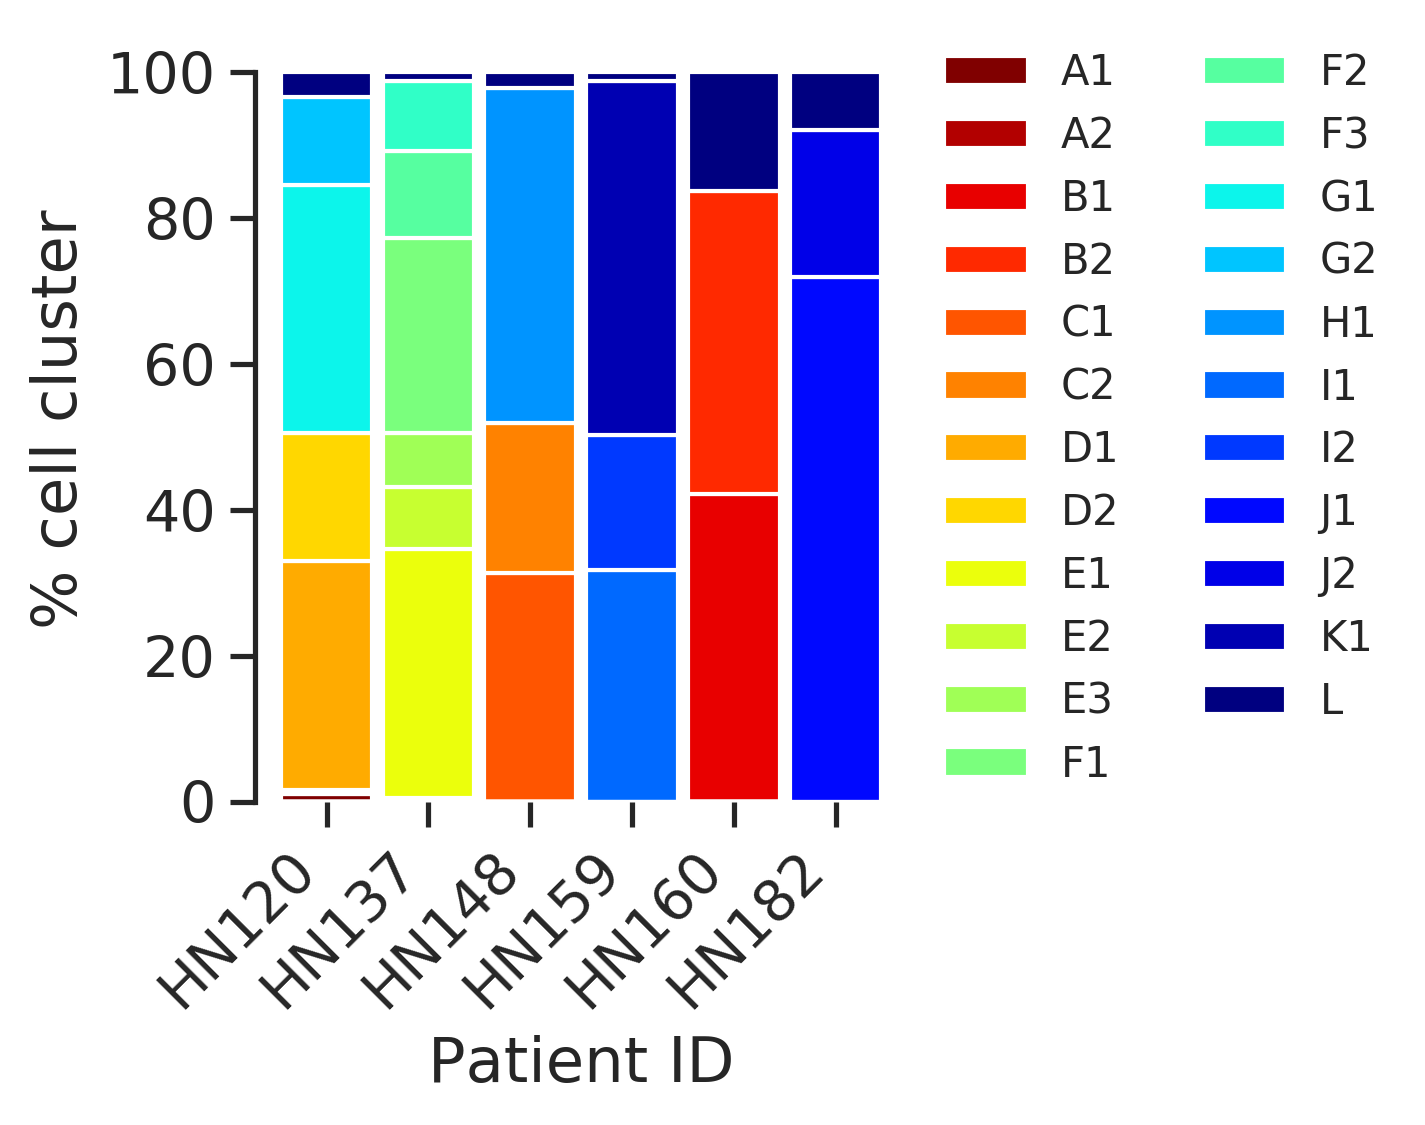

In [103]:
sns.set(font_scale=1.25, style='ticks')
fig, ax = plt.subplots(figsize=(5, 4))

cmap = plt.cm.get_cmap('jet_r')
# percent_patient_cluster_df.reset_index().pivot_table(index='patient_id', columns='cluster', values='percent').fillna(0).plot(kind='bar', cmap=cmap, stacked=True, ax=ax)
percent_patient_cluster_df.reset_index().pivot_table(index='patient_id', columns='cluster', values='percent').fillna(0).plot.bar(cmap=cmap, width=0.9, stacked=True, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, framealpha=0, prop={'size': 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel('% cell cluster')
ax.set_xlabel('Patient ID')

sns.despine(trim=True, bottom=True)

plt.tight_layout()
plt.savefig('../figure/Fig4A_cluster_abundance.svg')

### Select essential genes

In [104]:
ess_gene_list = pd.read_csv('../data/essential_genes.txt', header=None)[0].values.astype(str)
len(ess_gene_list)

1856

In [105]:
selected_ess_gene_list = [g for g in ess_gene_list if g in cell_exp_df.index]
len(selected_ess_gene_list)

1724

In [106]:
cell_exp_df = cell_exp_df.loc[selected_ess_gene_list]
cell_exp_df.shape

(1724, 1116)

### Cluster exp profile (average)

In [107]:
temp_df = cell_exp_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 1738)

In [108]:
cluster_df = temp_df.groupby('cluster')[selected_ess_gene_list].mean()

In [109]:
patient_df = temp_df.groupby('patient_id')[selected_ess_gene_list].mean()

Previously calculate mean after log transform, now calculate before log transform

In [110]:
log2_fc_cluster_df = (np.log2(cluster_df + 1) - np.log2((cluster_df + 1).mean()))
log2_fc_cluster_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.336828,0.473194,-0.390326,-0.147163,0.646827,0.356898,-0.255124,-0.028459,0.142566,-0.158692,...,-0.177887,0.389260,1.208190,1.406466,1.005729,0.993601,0.002875,-0.847698,0.025275,-0.017809
A2,0.733255,0.809530,-0.834464,0.771953,0.538206,0.755907,-0.358587,-0.056639,0.369062,-0.326568,...,0.223948,0.270926,1.113723,0.810861,0.075427,0.849787,0.437441,0.164013,0.050624,0.400535
B1,-0.100211,-0.538478,-1.148807,-0.073675,-0.892870,0.279855,-0.672124,-0.676477,1.316612,0.429262,...,1.130708,-0.338831,-0.292436,-0.528044,0.769074,-1.583869,-0.100731,1.161843,-0.685249,-0.646582
B2,0.040937,-0.886829,-0.741560,0.496356,-0.365436,-0.236306,-1.086670,-0.489469,1.349205,-1.025770,...,1.044026,-0.096792,-1.467909,-0.770604,0.665609,-0.612806,-0.157895,2.160976,-0.665155,-1.060445
C1,-0.750019,-1.262913,-0.632305,-0.296694,1.541076,-0.787158,0.979383,1.462460,-0.959434,-1.450773,...,0.666181,-0.078639,-1.035036,0.422739,-0.682967,-0.359247,-1.074340,-1.043342,0.739279,-0.244626


In [111]:
log2_fc_cluster_df.mean()

AAAS       -0.180858
AAMP       -0.225515
AARS       -0.253254
AARS2      -0.117625
AASDHPPT   -0.200147
              ...   
ZNF622     -0.211479
ZNF830     -0.150960
ZNHIT2     -0.400891
ZNRD1      -0.195526
ZWINT      -0.443079
Length: 1724, dtype: float64

In [112]:
cluster_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_{}.csv'.format(norm_type))
log2_fc_cluster_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_{}.csv'.format(norm_type))

## Patient exp profile (average)

In [113]:
log2_fc_patient_df = (np.log2(patient_df + 1) - np.log2((patient_df + 1).mean()))
log2_fc_patient_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
patient_id,,,,,,,,,,,,,,,,,,,,,
HN120,0.418215,0.110669,1.015166,-0.018434,-0.758945,-0.153255,0.444527,0.507195,-0.883422,0.135992,...,-0.340148,-0.665431,-0.505616,-0.008729,-0.824416,-0.573989,0.598097,-1.748677,-0.423060,1.011717
HN137,0.185904,0.871637,0.026307,0.170624,0.338500,0.309072,-0.252203,0.131633,-0.512731,0.054640,...,-0.399181,-0.255025,1.014527,0.616385,0.172376,0.694440,0.470465,-0.279272,-0.633648,0.149178
HN148,0.475748,0.431081,0.552121,-0.214077,0.982756,-0.470343,0.822678,0.912389,-0.823778,0.075063,...,0.111253,-0.049356,0.156812,0.156641,-0.435393,0.871184,-0.359668,-1.137334,0.685731,-0.084561
HN159,-0.628830,-1.045853,-0.539379,-0.356670,-0.259402,0.067322,-0.171390,-0.660097,-0.751669,0.548955,...,-0.416578,0.667230,-0.431141,-0.473644,0.324816,-0.962619,-0.701209,-0.216748,-0.090423,-0.789435
HN160,-0.261312,-0.686607,-1.037365,0.120490,-0.745159,-0.136026,-1.094627,-0.709547,0.963880,-0.323768,...,0.767305,-0.363943,-0.659935,-0.741907,0.492473,-1.120610,-0.146844,1.297849,-0.987063,0.161250


In [114]:
patient_df.to_csv('../preprocessed_data/HN_patient_specific/patient_{}.csv'.format(norm_type))
log2_fc_patient_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_patient_{}.csv'.format(norm_type))

### Cluster exp profile (p95)

In [115]:
temp_df = cell_exp_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 1738)

In [116]:
cluster_df = temp_df.groupby('cluster')[selected_ess_gene_list].quantile(.95)

Previously calculate mean after log transform, now calculate before log transform

In [117]:
log2_fc_cluster_df = (np.log2(cluster_df + 1) - np.log2((cluster_df + 1).mean()))
log2_fc_cluster_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.461489,0.417414,0.024497,0.100362,0.371842,0.183260,0.136592,-0.140284,0.067483,-0.045221,...,-0.104448,0.473373,1.500315,1.614111,1.483052,0.823241,0.128547,-0.470702,-0.078260,0.246769
A2,0.390387,0.551610,-0.800665,1.581944,0.294488,0.507739,-0.068542,-0.224886,0.190889,-0.173873,...,0.699340,0.204757,1.421738,0.801685,0.552962,0.692843,0.389257,0.899059,-0.137924,0.458666
B1,0.741547,-0.223048,-1.046257,-0.053604,-0.171600,0.830943,-0.763250,-0.313804,1.321898,0.155972,...,1.295337,-0.575934,-0.748251,-0.939983,1.479142,-1.574125,0.444371,1.767992,0.263099,0.123868
B2,0.554619,-0.703589,0.244151,1.439637,-0.024852,0.547113,-0.819173,0.134675,1.306942,-1.246839,...,0.935130,-0.065504,-2.450189,-0.844618,0.179200,-0.344792,0.044611,0.736479,0.314758,-1.141178
C1,-1.012750,-1.295061,-0.983003,-0.461961,1.471074,-1.103953,0.830897,1.246445,-1.130786,-1.459436,...,0.429007,-0.604659,-1.624405,-0.086635,-1.338488,-0.931824,-0.962445,-1.707492,-0.056026,-0.491491


In [118]:
log2_fc_cluster_df.mean()

AAAS       -0.179611
AAMP       -0.199991
AARS       -0.194301
AARS2      -0.489116
AASDHPPT   -0.137809
              ...   
ZNF622     -0.151276
ZNF830     -0.105628
ZNHIT2     -0.642356
ZNRD1      -0.137017
ZWINT      -0.324257
Length: 1724, dtype: float64

In [119]:
cluster_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_{}_p95.csv'.format(norm_type))
log2_fc_cluster_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_{}_p95.csv'.format(norm_type))

### Log2 fold-change (cell level)

In [120]:
log2_fc_df = (np.log2(cell_exp_df.T + 1) - np.log2(cell_exp_df.T + 1).mean())
log2_fc_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
RHH2176,-2.812154,-3.185373,3.182916,-0.371434,-5.587362,-4.446185,3.882617,2.042535,-6.075500,-1.760850,...,-4.041517,-2.365672,3.119946,4.264369,-0.434593,1.513428,5.365030,-0.590509,-3.599435,2.548932
RHH2177,3.743815,1.692862,0.262680,-0.371434,-5.587362,0.451055,2.091151,1.313180,0.650923,4.066207,...,-4.041517,-2.365672,-0.756816,-1.009147,-0.434593,0.730310,-2.152797,-0.590509,1.407312,2.946492
RHH2178,3.998546,-1.590825,5.160306,-0.371434,0.057936,-2.837376,2.849005,2.397357,-4.211561,-1.760850,...,0.201847,-2.365672,-0.756816,-1.009147,-0.434593,1.529774,2.781719,-0.590509,-3.599435,3.344964
RHH2179,-2.812154,1.889732,2.190622,-0.371434,-1.022374,1.881861,1.229423,1.342596,-0.504430,-1.760850,...,1.346328,1.270083,-0.756816,-1.009147,-0.434593,-3.546187,2.984706,-0.590509,-3.599435,2.909540
RHH2180,2.248326,0.246250,3.432947,-0.371434,-0.694485,2.052385,-3.323323,1.430291,-0.251495,1.176495,...,-0.252831,-2.365672,-0.756816,-1.009147,-0.434593,-3.546187,-0.196741,-0.590509,-3.599435,2.926757


In [121]:
log2_fc_df.mean()

AAAS        1.750889e-15
AAMP       -2.232384e-15
AARS       -2.834451e-15
AARS2       2.141855e-16
AASDHPPT    5.206508e-15
                ...     
ZNF622      3.513319e-15
ZNF830     -4.288087e-15
ZNHIT2     -3.565447e-16
ZNRD1       2.039786e-15
ZWINT       5.471529e-15
Length: 1724, dtype: float64

In [122]:
log2_fc_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_{}.csv'.format(norm_type))

### [TESTING] calculate fc_mat_norm.csv

In [44]:
mat_norm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_mat_norm.csv', index_col=0)
mat_norm_df = mat_norm_df[cell_df.index]
mat_norm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055681,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
AAAS,0.0,0.433299,0.818982,0.0,0.165648,0.000000,0.0,0.731827,0.104433,0.956780,...,0.0,0.000000,0.157415,0.240023,0.052505,0.01466,0.141820,0.078456,0.0,0.000000
AACS,0.0,0.000000,0.000000,0.0,0.000000,0.022271,0.0,0.000000,0.000000,0.000000,...,0.0,0.010963,0.157415,0.460138,0.035308,0.00000,0.073422,0.208026,0.0,0.061757
AADAC,0.0,0.000000,0.740419,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.548487,0.000000,0.000000,0.00000,0.000000,0.370797,0.0,0.000000
AADAT,0.0,0.000000,0.000000,0.0,0.000000,0.764792,0.0,0.000000,0.000000,0.789582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [45]:
selected_ess_gene_list = [g for g in ess_gene_list if g in mat_norm_df.index]
len(selected_ess_gene_list)

1725

In [46]:
temp_df = mat_norm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 14894)

In [47]:
cluster_mat_norm_df = temp_df.groupby('cluster')[selected_ess_gene_list].mean()
cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.203942,0.251364,0.287192,0.021260,0.932246,0.469491,0.237488,1.177627,0.781101,0.060439,...,0.363770,0.180916,0.141534,0.223636,0.055004,0.491300,0.132271,0.009826,0.169033,0.646892
A2,0.260138,0.311930,0.273458,0.053836,0.891798,0.562975,0.217334,1.161445,0.907508,0.054967,...,0.435140,0.169147,0.129329,0.162555,0.025060,0.466529,0.163668,0.023077,0.167287,0.830410
B1,0.169208,0.162288,0.313887,0.033522,0.391745,0.378804,0.112958,0.912538,1.329696,0.109232,...,0.979944,0.116559,0.052198,0.088713,0.077773,0.156719,0.156215,0.076213,0.135590,0.482089
B2,0.205009,0.100318,0.341032,0.066469,0.509312,0.278734,0.119010,1.039062,1.260021,0.045461,...,0.953185,0.100230,0.015142,0.075573,0.057674,0.229027,0.125636,0.065257,0.130661,0.449586
C1,0.116291,0.073113,0.348676,0.017248,1.308609,0.264147,0.613081,2.106093,0.418565,0.032720,...,0.667573,0.189609,0.021305,0.174515,0.006136,0.276068,0.064438,0.005770,0.300613,0.687360


In [48]:
log2_fc_cluster_mat_norm_df = (cluster_mat_norm_df - np.log(np.power(np.e, cluster_mat_norm_df).mean()))
log2_fc_cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.019561,0.060424,-0.168444,-0.006504,0.244417,0.094687,-0.059026,-0.093287,0.067042,-0.019053,...,-0.107612,0.007493,0.079155,0.119430,0.028716,0.184167,-0.001990,-0.012368,-0.014521,-0.028685
A2,0.075756,0.120990,-0.182177,0.026072,0.203968,0.188171,-0.079181,-0.109469,0.193450,-0.024525,...,-0.036242,-0.004276,0.066949,0.058349,-0.001228,0.159396,0.029406,0.000882,-0.016268,0.154833
B1,-0.015174,-0.028653,-0.141749,0.005758,-0.296085,0.004000,-0.183557,-0.358376,0.615638,0.029740,...,0.508563,-0.056864,-0.010181,-0.015493,0.051485,-0.150414,0.021954,0.054018,-0.047965,-0.193488
B2,0.020628,-0.090622,-0.114604,0.038705,-0.178517,-0.096071,-0.177504,-0.231852,0.545963,-0.034031,...,0.481803,-0.073193,-0.047238,-0.028633,0.031386,-0.078107,-0.008626,0.043062,-0.052893,-0.225991
C1,-0.068090,-0.117828,-0.106959,-0.010516,0.620779,-0.110658,0.316566,0.835179,-0.295493,-0.046772,...,0.196192,0.016186,-0.041074,0.070309,-0.020152,-0.031066,-0.069824,-0.016425,0.117059,0.011783


In [49]:
cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_mat_norm.csv')
log2_fc_cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_mat_norm.csv')

### [TESTING] calculate fc_mat_norm_p95.csv

In [30]:
mat_norm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_mat_norm.csv', index_col=0)
mat_norm_df = mat_norm_df[cell_df.index]
mat_norm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055681,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
AAAS,0.0,0.433299,0.818982,0.0,0.165648,0.000000,0.0,0.731827,0.104433,0.956780,...,0.0,0.000000,0.157415,0.240023,0.052505,0.01466,0.141820,0.078456,0.0,0.000000
AACS,0.0,0.000000,0.000000,0.0,0.000000,0.022271,0.0,0.000000,0.000000,0.000000,...,0.0,0.010963,0.157415,0.460138,0.035308,0.00000,0.073422,0.208026,0.0,0.061757
AADAC,0.0,0.000000,0.740419,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.548487,0.000000,0.000000,0.00000,0.000000,0.370797,0.0,0.000000
AADAT,0.0,0.000000,0.000000,0.0,0.000000,0.764792,0.0,0.000000,0.000000,0.789582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [31]:
selected_ess_gene_list = [g for g in ess_gene_list if g in mat_norm_df.index]
len(selected_ess_gene_list)

1725

In [32]:
temp_df = mat_norm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 14894)

In [33]:
cluster_mat_norm_df = temp_df.groupby('cluster')[selected_ess_gene_list].quantile(.95)
cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.808064,0.754596,1.273619,0.149320,1.686638,1.239720,0.977641,1.949532,1.524761,0.259986,...,0.934054,0.601157,0.787038,1.003581,0.369825,1.203358,0.557563,0.070844,0.561487,1.585200
A2,0.808471,0.901488,0.882168,0.404977,1.481084,1.203542,1.030581,1.768354,1.640080,0.261128,...,1.307099,0.639214,0.735579,0.849052,0.179211,1.127906,0.558872,0.169950,0.549437,1.779246
B1,0.968956,0.491382,1.004275,0.210315,1.174615,1.200530,0.464444,1.747822,2.310382,0.562958,...,2.087558,0.563906,0.348975,0.449483,0.542081,0.586554,0.799832,0.486178,0.973786,1.670682
B2,1.266707,0.383786,1.673308,0.562371,1.256393,1.296148,0.556649,2.221348,2.115790,0.241062,...,1.714830,0.618857,0.065007,0.372953,0.223569,0.959742,0.703203,0.264151,0.779010,1.191673
C1,0.412881,0.201336,0.796851,0.098539,1.970299,0.624915,1.344819,2.730899,0.852431,0.172872,...,1.302711,0.505131,0.081706,0.578164,0.034901,0.618396,0.283463,0.019165,0.605526,1.347100


In [34]:
log2_fc_cluster_mat_norm_df = (cluster_mat_norm_df - np.log(np.power(np.e, cluster_mat_norm_df).mean()))
log2_fc_cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.109002,0.139290,-0.046551,-0.019176,0.315467,0.203664,0.020599,-0.072330,0.070616,-0.102217,...,-0.183925,-0.066380,0.420613,0.450896,0.212579,0.283646,0.013667,-0.051155,-0.061974,0.076591
A2,0.109409,0.286182,-0.438002,0.236481,0.109913,0.167486,0.073540,-0.253508,0.185935,-0.101075,...,0.189120,-0.028324,0.369154,0.296367,0.021965,0.208194,0.014977,0.047952,-0.074025,0.270638
B1,0.269894,-0.123924,-0.315895,0.041819,-0.196555,0.164474,-0.492598,-0.274040,0.856237,0.200755,...,0.969579,-0.103632,-0.017450,-0.103202,0.384835,-0.333158,0.255936,0.364180,0.350325,0.162073
B2,0.567645,-0.231520,0.353139,0.393875,-0.114778,0.260092,-0.400392,0.199485,0.661644,-0.121141,...,0.596851,-0.048681,-0.301417,-0.179732,0.066323,0.040030,0.159307,0.142152,0.155549,-0.316936
C1,-0.286181,-0.413970,-0.523319,-0.069957,0.599128,-0.411141,0.387777,0.709037,-0.601714,-0.189332,...,0.184732,-0.162406,-0.284719,0.025478,-0.122345,-0.301316,-0.260433,-0.102833,-0.017935,-0.161508


In [35]:
cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_mat_norm_p95.csv')
log2_fc_cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_mat_norm_p95.csv')

### [TESTING] calculate fc_mat_norm_log2_p95.csv

In [40]:
mat_norm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_mat_norm.csv', index_col=0)
mat_norm_df = mat_norm_df[cell_df.index]
mat_norm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055681,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
AAAS,0.0,0.433299,0.818982,0.0,0.165648,0.000000,0.0,0.731827,0.104433,0.956780,...,0.0,0.000000,0.157415,0.240023,0.052505,0.01466,0.141820,0.078456,0.0,0.000000
AACS,0.0,0.000000,0.000000,0.0,0.000000,0.022271,0.0,0.000000,0.000000,0.000000,...,0.0,0.010963,0.157415,0.460138,0.035308,0.00000,0.073422,0.208026,0.0,0.061757
AADAC,0.0,0.000000,0.740419,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.548487,0.000000,0.000000,0.00000,0.000000,0.370797,0.0,0.000000
AADAT,0.0,0.000000,0.000000,0.0,0.000000,0.764792,0.0,0.000000,0.000000,0.789582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [41]:
selected_ess_gene_list = [g for g in ess_gene_list if g in mat_norm_df.index]
len(selected_ess_gene_list)

1725

In [42]:
temp_df = mat_norm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 14894)

In [43]:
cluster_mat_norm_df = temp_df.groupby('cluster')[selected_ess_gene_list].quantile(.95)
cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.808064,0.754596,1.273619,0.149320,1.686638,1.239720,0.977641,1.949532,1.524761,0.259986,...,0.934054,0.601157,0.787038,1.003581,0.369825,1.203358,0.557563,0.070844,0.561487,1.585200
A2,0.808471,0.901488,0.882168,0.404977,1.481084,1.203542,1.030581,1.768354,1.640080,0.261128,...,1.307099,0.639214,0.735579,0.849052,0.179211,1.127906,0.558872,0.169950,0.549437,1.779246
B1,0.968956,0.491382,1.004275,0.210315,1.174615,1.200530,0.464444,1.747822,2.310382,0.562958,...,2.087558,0.563906,0.348975,0.449483,0.542081,0.586554,0.799832,0.486178,0.973786,1.670682
B2,1.266707,0.383786,1.673308,0.562371,1.256393,1.296148,0.556649,2.221348,2.115790,0.241062,...,1.714830,0.618857,0.065007,0.372953,0.223569,0.959742,0.703203,0.264151,0.779010,1.191673
C1,0.412881,0.201336,0.796851,0.098539,1.970299,0.624915,1.344819,2.730899,0.852431,0.172872,...,1.302711,0.505131,0.081706,0.578164,0.034901,0.618396,0.283463,0.019165,0.605526,1.347100


In [50]:
log2_fc_cluster_mat_norm_df = (np.log2(cluster_mat_norm_df+1) - np.log2(cluster_mat_norm_df+1).mean())
log2_fc_cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.130681,0.155404,0.027316,0.002885,0.214390,0.161794,0.072084,0.015985,0.121292,-0.089225,...,-0.061419,-0.022339,0.441585,0.406982,0.264899,0.230891,0.041804,-0.048418,-0.013386,0.134637
A2,0.131007,0.271393,-0.245280,0.292652,0.099559,0.138301,0.110196,-0.075472,0.185727,-0.087917,...,0.193033,0.011549,0.399431,0.291187,0.048729,0.180622,0.043016,0.079281,-0.024563,0.239054
B1,0.253667,-0.079085,-0.154595,0.077487,-0.090651,0.136327,-0.361344,-0.086212,0.512143,0.221647,...,0.613419,-0.056301,0.035878,-0.060060,0.435787,-0.242916,0.250376,0.424441,0.324659,0.181569
B2,0.456834,-0.187115,0.260951,0.445842,-0.037393,0.197692,-0.273253,0.143163,0.424743,-0.111057,...,0.427814,-0.006479,-0.305122,-0.138317,0.102003,0.061851,0.170764,0.191002,0.174768,-0.103607
C1,-0.225124,-0.391096,-0.312205,-0.062309,0.359197,-0.301160,0.317780,0.355022,-0.325435,-0.192587,...,0.190286,-0.111565,-0.282678,0.062648,-0.139599,-0.214248,-0.237445,-0.119778,0.026740,-0.004760


In [51]:
cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_mat_norm_log2_p95.csv')
log2_fc_cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_mat_norm_log2_p95.csv')

### t-SNE (NOT IN USE)

Already changed to UMAP

In [60]:
from sklearn.manifold import TSNE

X = log2_fc_tmm_df.values
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1116, 2)

In [61]:
tsne_df = pd.DataFrame(X_embedded, index=log2_fc_tmm_df.index, columns=['tSNE1', 'tSNE2'])
tsne_df = pd.merge(tsne_df, cell_df, left_index=True, right_index=True)
tsne_df.head()

,tSNE1,tSNE2,sample_id,batch,cell_number,n_genes,percent_mito,n_counts,louvain,louvain2,cluster,UMAP1,UMAP2,patient_id
RHH2176,2.851946,10.360536,HN120P,RHH,2176,3602,0.080225,998435.90,11,NaN,L,3.546686,-0.249621,HN120
RHH2177,-0.040760,8.018424,HN120P,RHH,2177,5748,0.089887,997598.06,3,0.0,D1,-3.736655,-4.481306,HN120
RHH2178,3.531928,13.163946,HN120P,RHH,2178,6648,0.117123,995340.75,3,0.0,D1,-4.161313,-4.560451,HN120
RHH2179,0.859202,7.233406,HN120P,RHH,2179,7076,0.104144,995187.60,3,0.0,D1,-4.607369,-4.124364,HN120
RHH2180,0.320757,8.042154,HN120P,RHH,2180,7261,0.111637,993863.56,3,0.0,D1,-5.340749,-4.571555,HN120


In [62]:
# tsne_df.to_csv('../preprocessed_data/HN_patient_specific/tsne.csv')